# **Customer Conversion Prediction**


# **Problem Statement**
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.


### **Features:**

*  age (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this   client
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


*   Output variable (desired target):
y - has the client subscribed to the insurance?


# **Insights  from Problem Statement and Features:**:
After Reading the Problem Statement & Going through the Features ,column by column in a data set, we can Say this is a Supervised Learning Problem With Classification Model of Binary Subset Classification(Y/N)

**Importing Libraries**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading & reading the Dataset**

In [84]:
df = pd.read_csv("Customer Conversion Prediction.csv")

**Basic statistics of Data**

In [85]:
df.shape

(45211, 11)

In [86]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [87]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [88]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [89]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# **Data Cleaning**

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset to improve its quality and ensure that it is ready for analysis. It involves tasks such as handling missing or duplicate data, correcting data types, and removing outliers or irrelevant information.

**MISSING VALUES**

In [90]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**Finding Duplicate Values**

In [92]:
df.duplicated().sum()

6

**Dropping Duplicate Values**

In [93]:
df= df.drop_duplicates()

In [94]:
df.duplicated().sum()

0

In [95]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

**Checking Data Types of Columns**

In [96]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

**Categorical Coulmuns**

In [97]:
df["job"].value_counts()


blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [98]:
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to drop
df['job'] =df['job'].replace('unknown',np.nan)
df.job.isnull().sum()

288

In [99]:
#after removing null values checking for the sum of null vaues
df=df.dropna(subset=['job'])
df.job.isnull().sum()

0

In [100]:
df["marital"].value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

In [101]:
df["education_qual"].value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [102]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23202+13301+6851+1730)) * 100 )

Percentage for "Unknown":  3.8372815189424188


Unknown percentage is 3.8% so if we delete also it will note affect the dataset

In [103]:
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)
df.education_qual.isnull().sum()

1730

In [104]:
df = df. dropna(subset=['education_qual'])
df.education_qual.isnull().sum()

0

In [105]:
df["call_type"].value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [106]:
print('Percentage for "Unknown": ',((12283) / (29285+13020+12283)) * 100 )

Percentage for "Unknown":  22.501282333113505


Unknown call type percentage is 22.50% so we will keep as it is.

In [107]:
df["mon"].value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

In [108]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

**Numerical coumns**

In [109]:
df["age"].value_counts()

32    2041
31    1947
33    1931
34    1881
35    1834
      ... 
89       3
90       2
95       2
88       2
94       1
Name: age, Length: 75, dtype: int64

In [110]:
df["day"].value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

In [111]:
df["dur"].value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [112]:
df["num_calls"].value_counts()

1     16740
2     11936
3      5277
4      3397
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: num_calls, dtype: int64

In [113]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [114]:
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


It is around 81% values are unknown. So will keep unknown value as it is.

**Target Variable (Y/N)**

In [115]:
df['y'].value_counts()

no     38166
yes     5021
Name: y, dtype: int64

In [116]:
print('Percentage for "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39916+5289)) * 100 )


Percentage for "no":  88.29996681782988
Percentage for "yes":  11.700033182170113


Our Data is imbalanced

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


# **Outlier Detection & Correction**






**Outlier Detection**

1.   Z-Score Z-Score(x)=(x-mean(x)) / SD(x) Threshold Limit Z-Score > 3 and Z-Score < -3 ---> Outlier
2.   IQR IQR = Q3(75%)-Q1(25%) Upper Threshold = Q3 + (1.5 * IQR) Lower Threshold = Q1 - (1.5 * IQR)
3. Plotting Box Plot








**Outlier Correction**
1.   Deletion
2.   Clip/Strip


# **AGE**

<Axes: xlabel='age'>

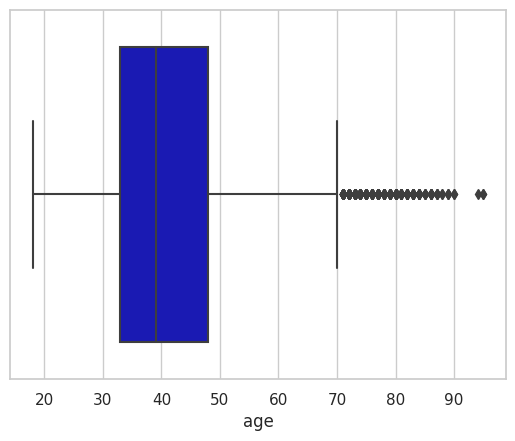

In [118]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='mediumblue')

In [119]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [120]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)
df['age'].describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<Axes: xlabel='age'>

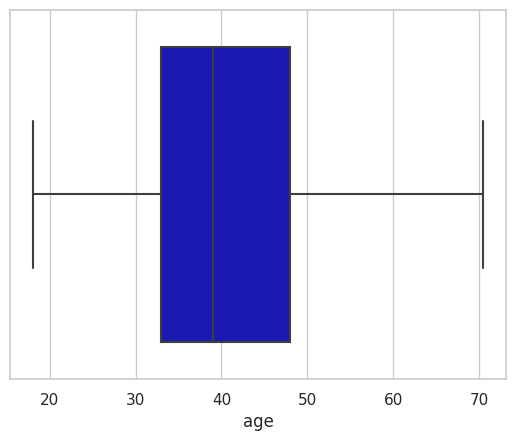

In [121]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='mediumblue')

## **Day**

<Axes: xlabel='day'>

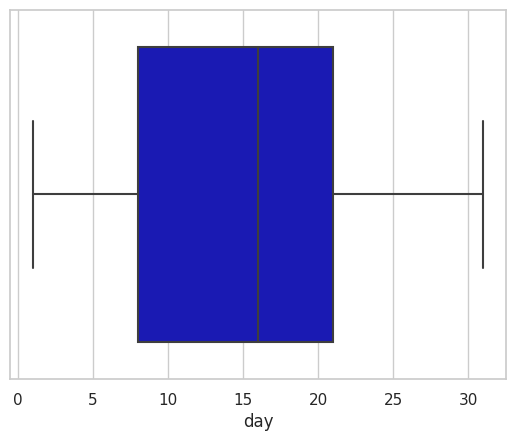

In [122]:
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='mediumblue')

In [123]:
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)
df['day'].describe()


Upper bound: 40.5 Lower bound : -11.5


count    43187.000000
mean        15.809896
std          8.305826
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

From Box plot itself we can tell there is no outlier, even though checked with IQR approach. min and max values are in between lower and upper bound.

## **Duration**


<Axes: >

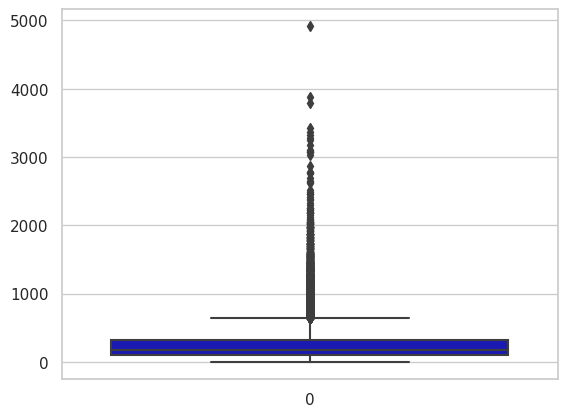

In [124]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='mediumblue')

In [125]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


In [126]:
df.dur = df.dur.clip(-219.5,640.5)
df["dur"].describe()

count    43187.000000
mean       234.788038
std        176.240001
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

<Axes: >

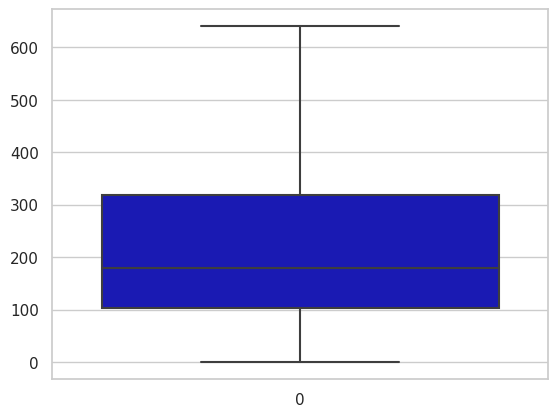

In [127]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='mediumblue')

## **No of Calls**

<Axes: >

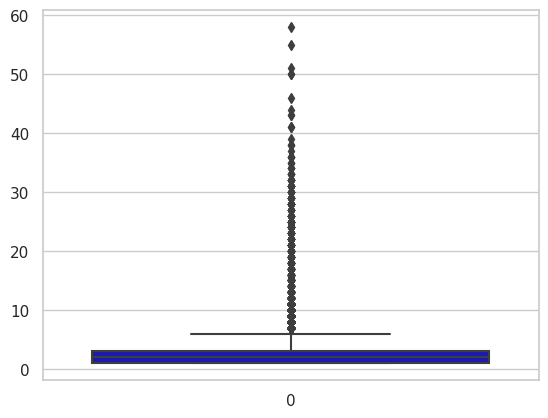

In [128]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='mediumblue')

In [129]:
#detecting Outlier for number of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [130]:
df.num_calls = df.num_calls.clip(-2,6.0)
df['num_calls'].describe()

count    43187.000000
mean         2.393081
std          1.598892
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: >

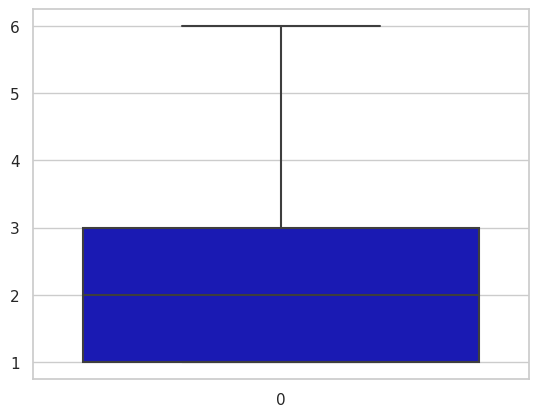

In [131]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='mediumblue')

we detucted and removed outlier for all numerical columns. So we are done with Data Cleaning Process.

# **EDA - Exploratory Data Analysis**
EDA is an important step in the data analysis process, as it helps to identify potential issues with the data and to develop a deeper understanding of the relationships between variables.

**Distribution of Feature and Target variable**

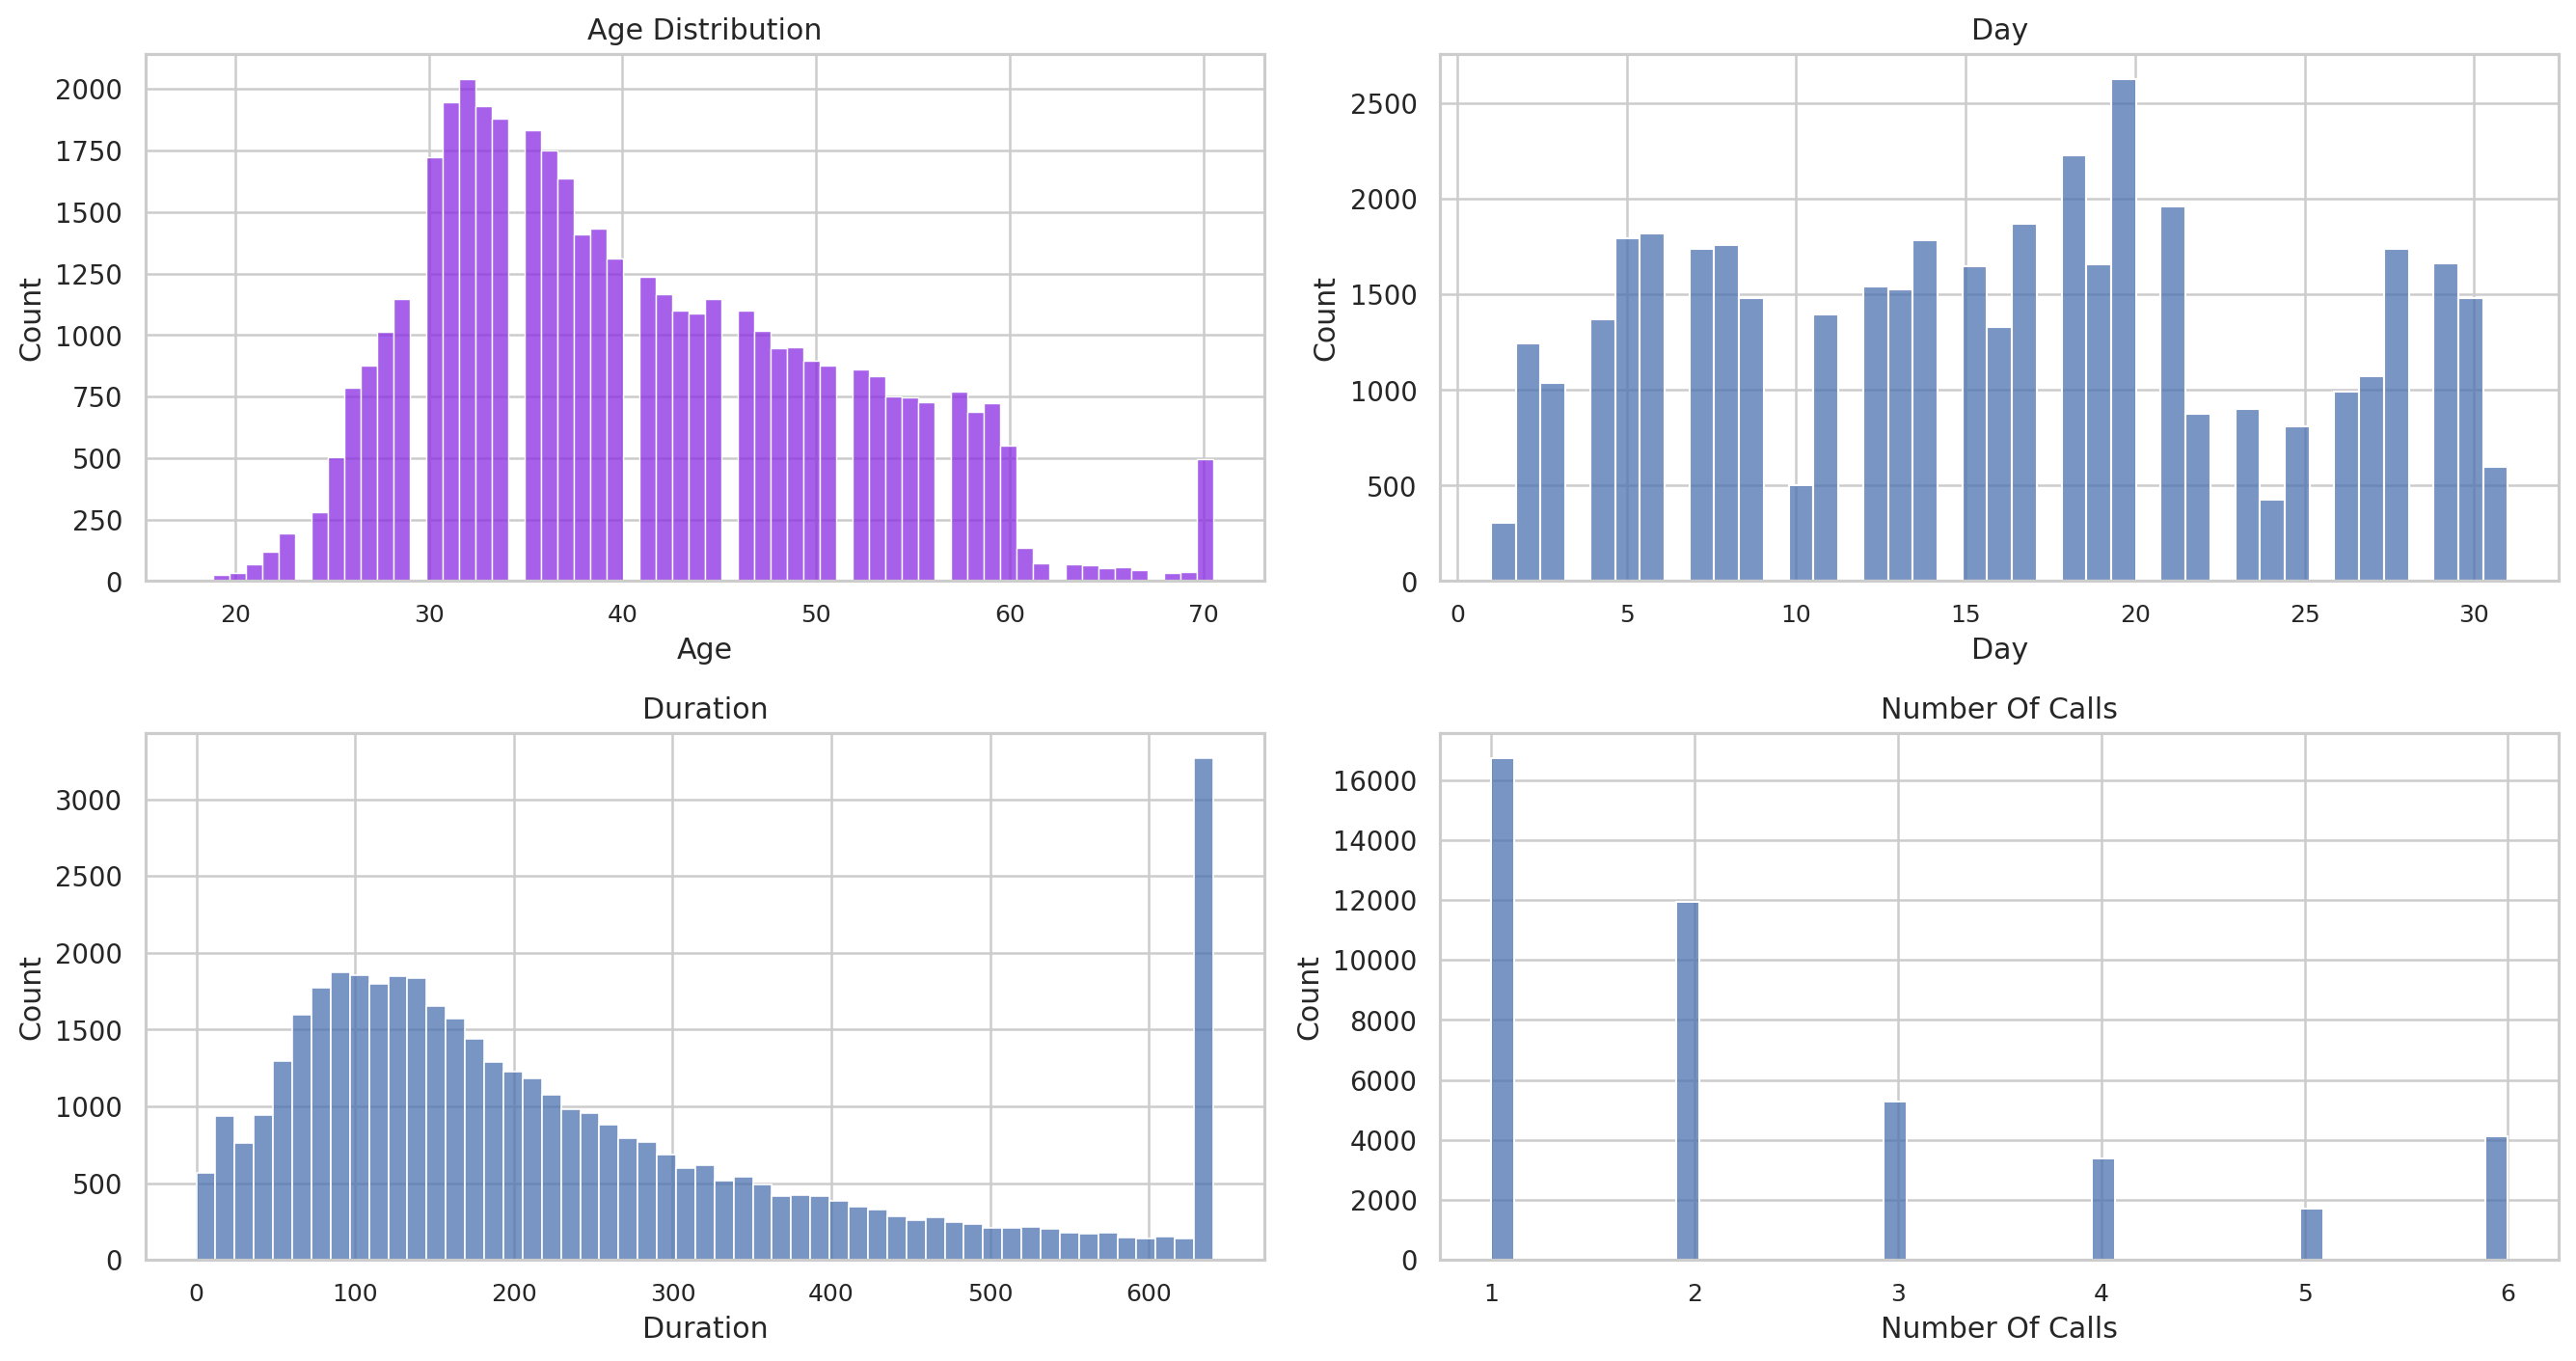

In [132]:
plt.figure(figsize = (15,8),dpi=180)
plt.subplot(2,2,1)
sns.histplot((df.age),color='BlueViolet')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.xticks(rotation = 0,fontsize = 10)
plt.ylabel('Count')

plt.subplot(2,2,2)
sns.histplot(df['day'])
plt.title('Day' )
plt.xlabel('Day')
plt.xticks(rotation = 0,fontsize = 10)
plt.ylabel('Count')

plt.subplot(2,2,3)
sns.histplot((df.dur))
plt.title('Duration')
plt.xlabel('Duration')
plt.xticks(rotation = 0,fontsize = 10)
plt.ylabel('Count')

plt.subplot(2,2,4)
sns.histplot(df['num_calls'])
plt.title('Number Of Calls')
plt.xlabel('Number Of Calls')
plt.xticks(rotation = 0,fontsize = 10)
plt.ylabel('Count')


plt.tight_layout()







# **Features vs Target**

## **Categorical Variable vs Target (Categorical) -- Job, Marital, Educational Qualification, Call Type, Month**

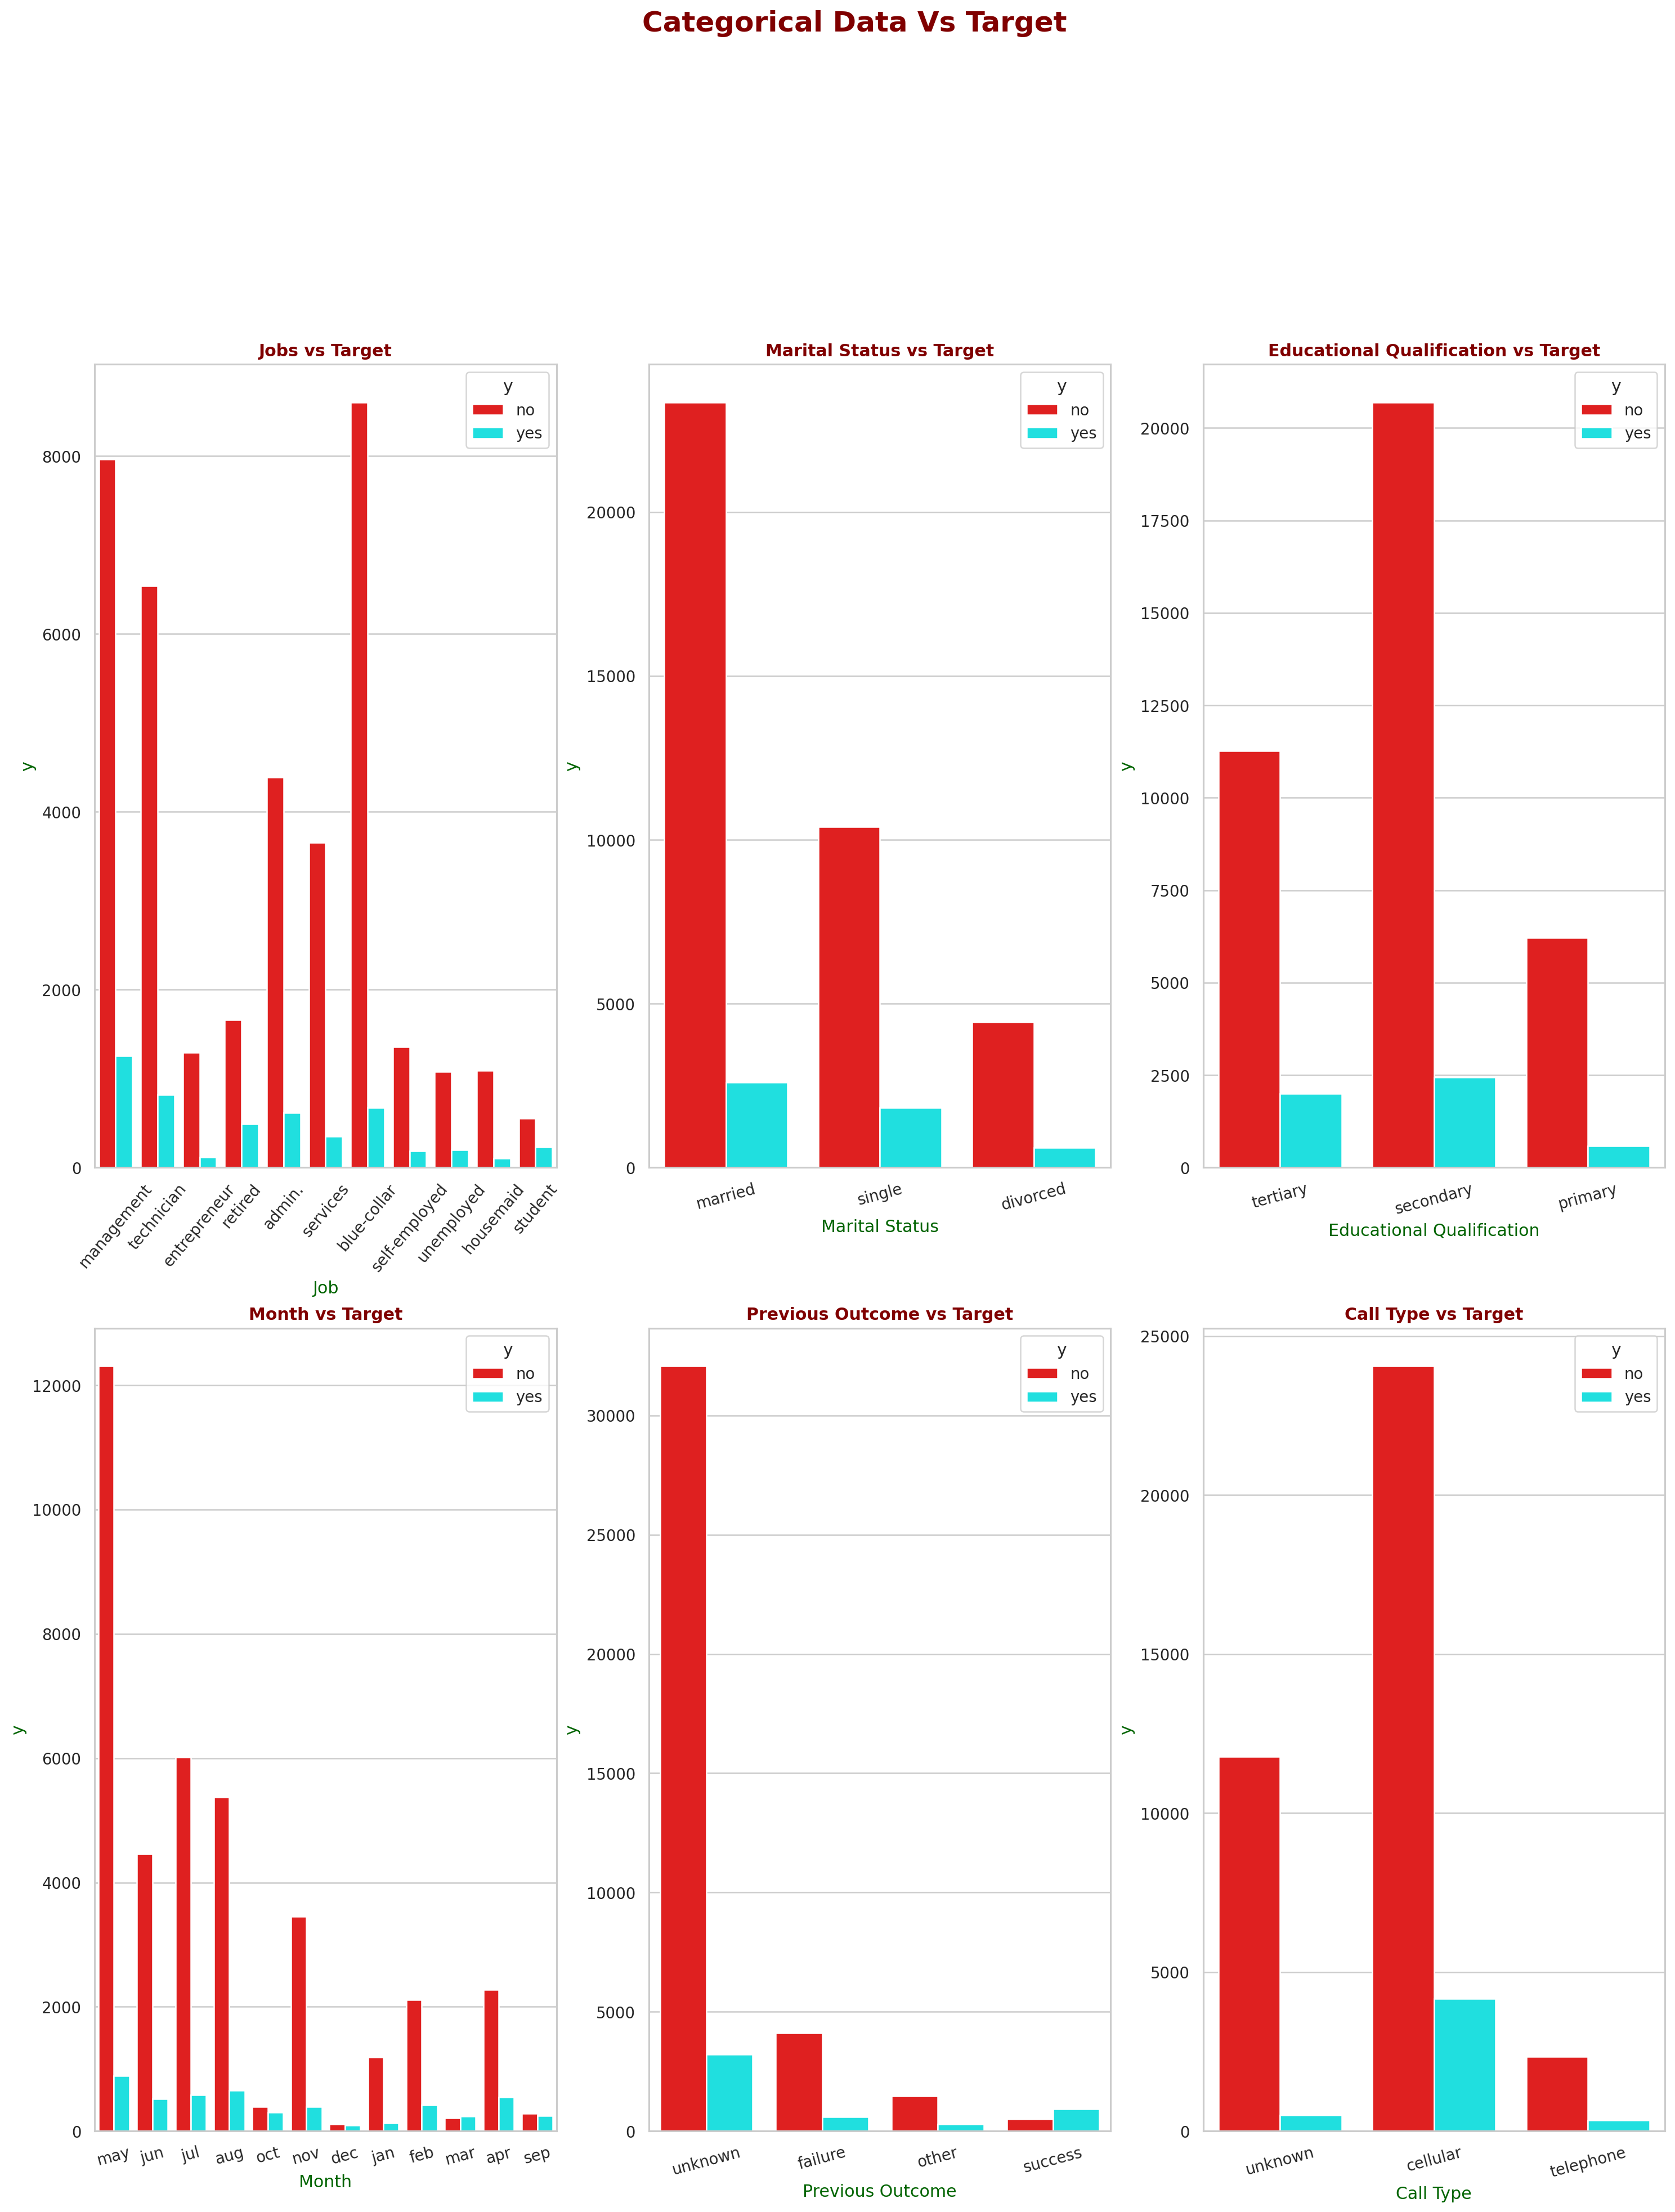

In [134]:
plt.figure(figsize=(20,35), dpi=180)
plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')

#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Red', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Red', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=15)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Red', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=15)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Red', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=15)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Red', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=15)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Red', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=15)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


plt.show()


### **Categorical Data Vs Target**
**Jobs vs Target**

*   Target (No) : Blue Collar
*   Suscribed (Yes): Management

**Marital Status vs Target**

*   Target (No) : Married
*   Subscribed (Yes): Married

**Educational Qualification vs Target**

*   Target (No): Secondary
*   Subscribed (Yes): Secondary

**Month vs Target**

*   Target (No): May
*   Subscribed (Yes): May

**Previous Outcome vs Target**

*   Target (No): unknown
*   Subscribed (Yes): unknown

**Call Type vs Target**

*   Target (No): Cellular
*   Subscribed (Yes): Cellular

### **Numerical Variable vs Target -- Age, Day, Duration, No of Calls**

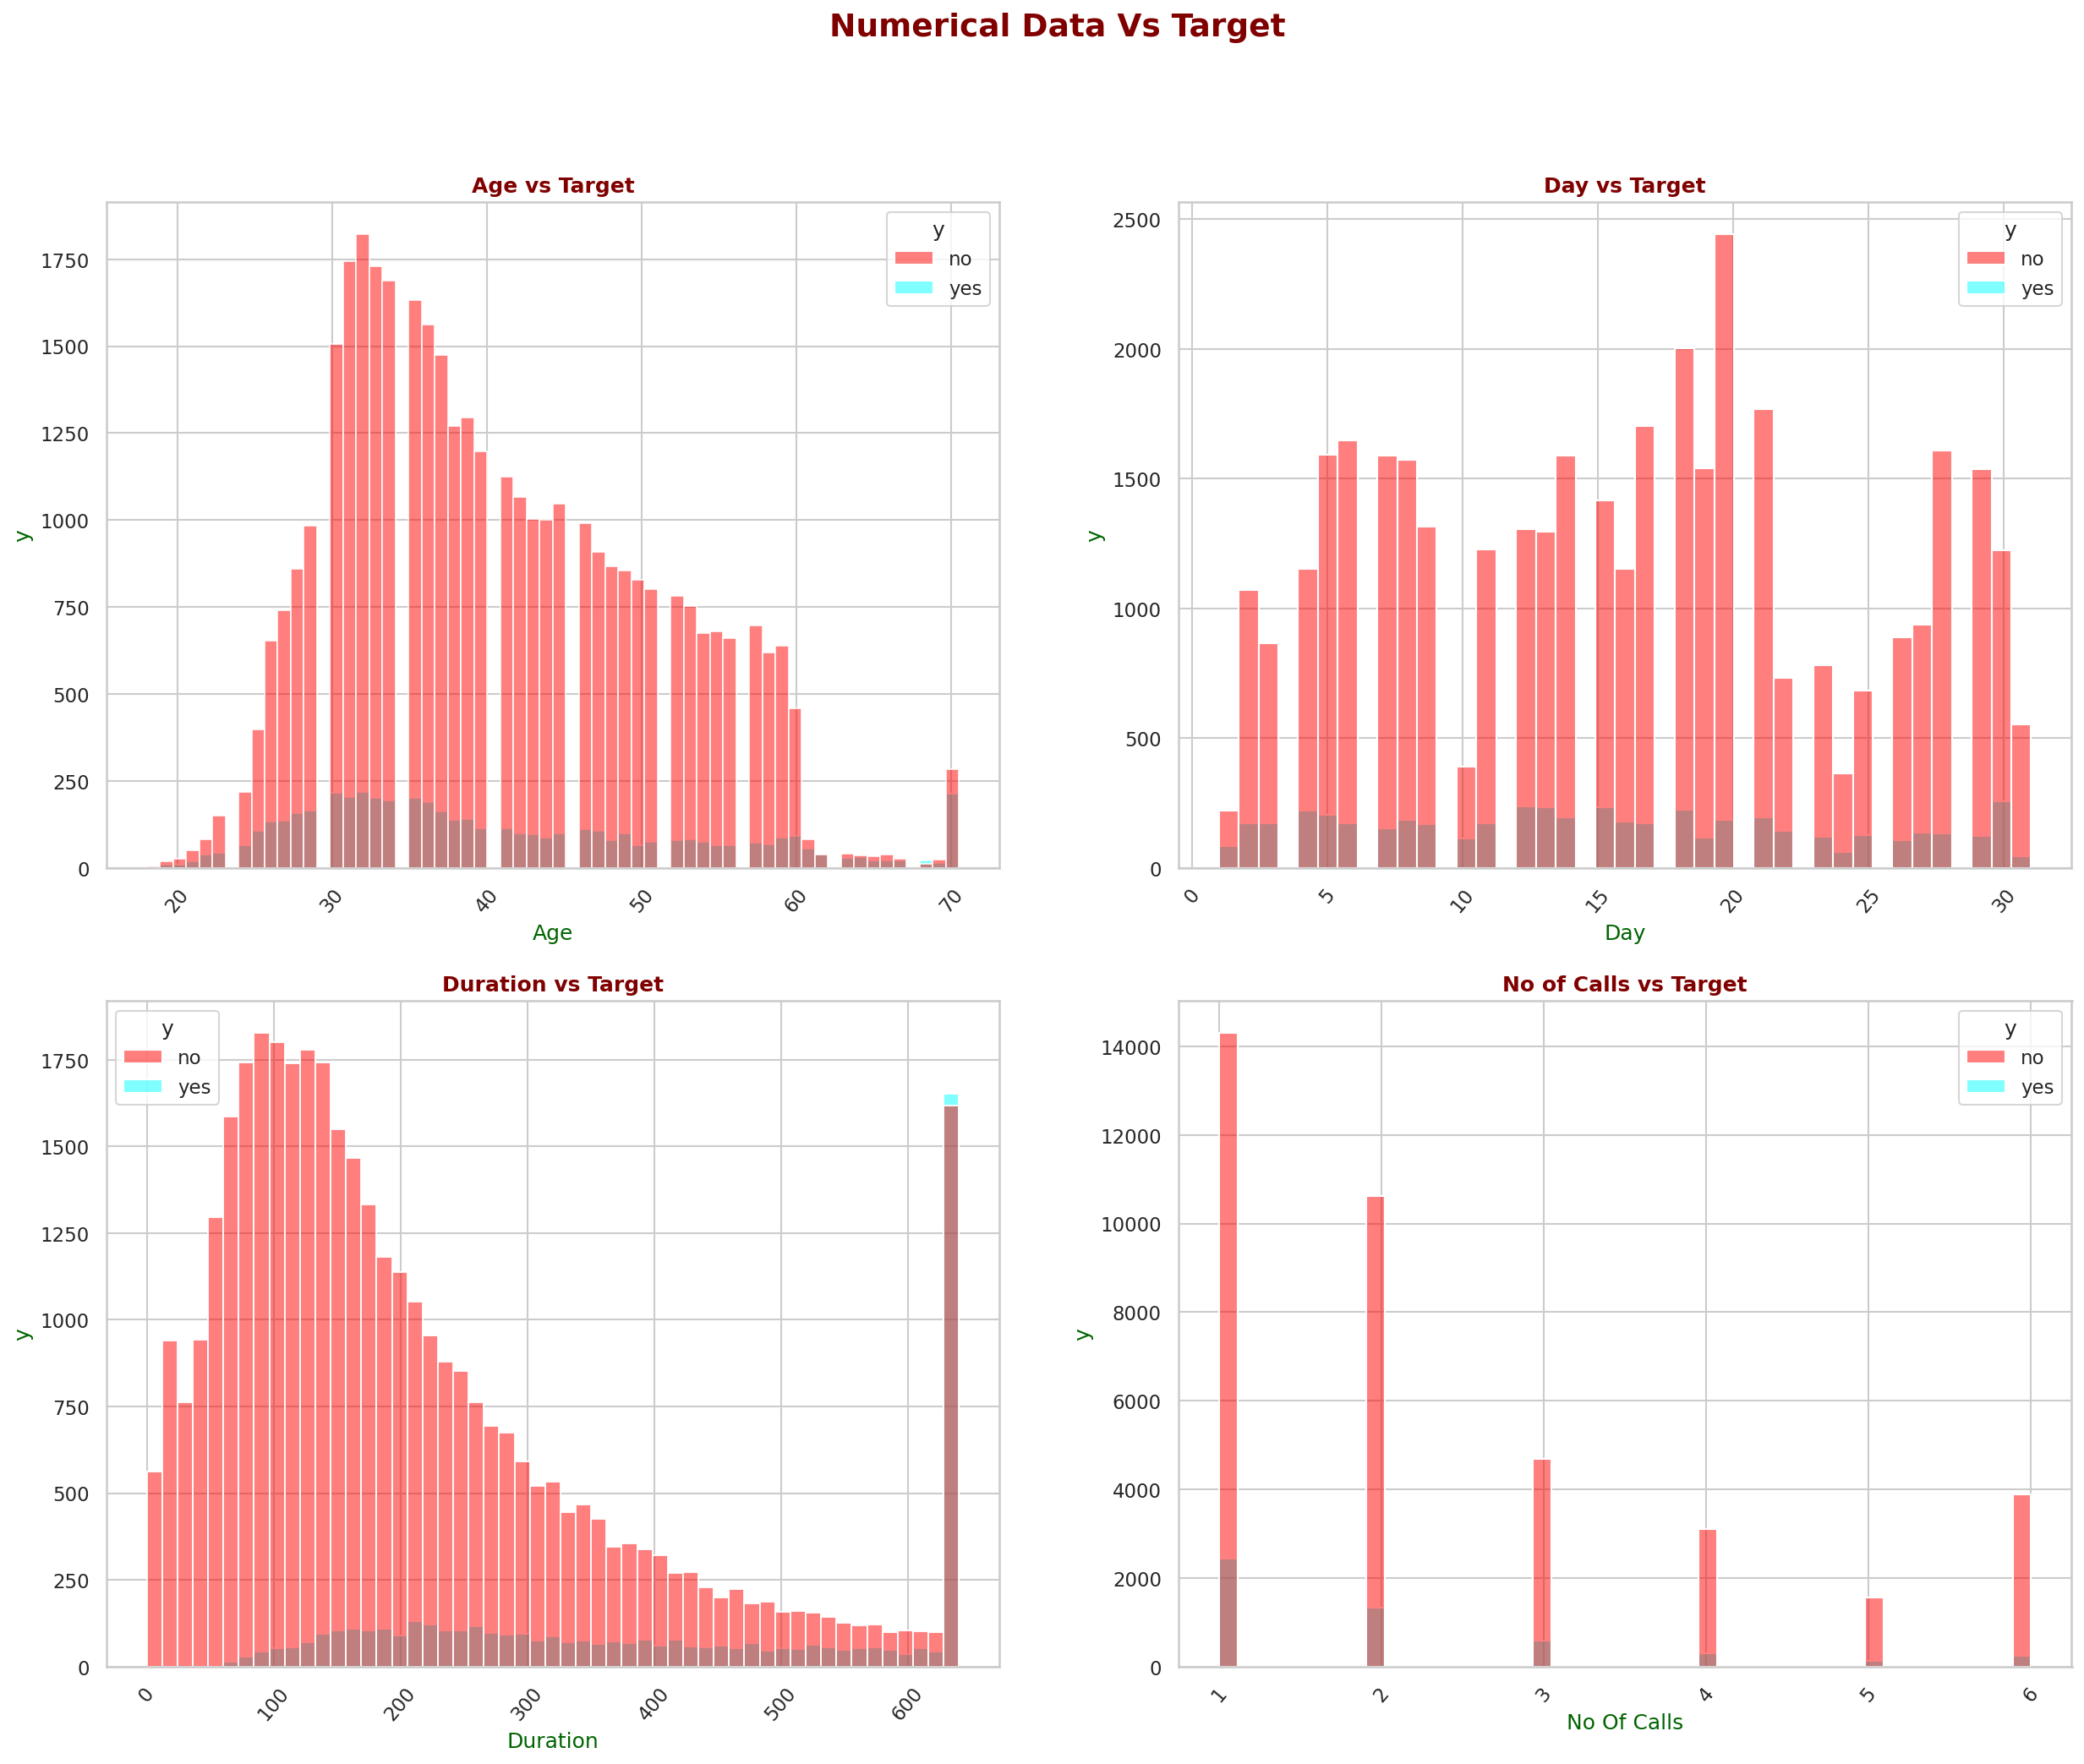

In [133]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Red', 'cyan']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Red', 'cyan']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Red', 'cyan']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Red', 'cyan']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()

### **Numeric Data vs Target**

**Age vs Target**

*   Target : Middle age people
*   Subscribed : Middle age people

**Day vs Target**

*   Target : Middle of Month
*   Subscribed : Middle of Month

**Duration vs Target**

*  Duration of call is also important to subscribe for insurance.

**No of Calls vs Target**

*  No of calls increase subscrition also getting increase.


# **Encoding**

**Job**

In [ ]:
df['job'].value_counts().index[::-1]

Index(['student', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed',
       'retired', 'services', 'admin.', 'technician', 'management',
       'blue-collar'],
      dtype='object')

In [53]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no,0


**Martial status**

In [54]:
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no,0
5,35.0,8,1,tertiary,unknown,5,may,139.0,1,unknown,no,0
6,28.0,8,3,tertiary,unknown,5,may,217.0,1,unknown,no,0


**Educational Qualification**

In [55]:
#encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no,0
5,35.0,8,1,3,unknown,5,may,139.0,1,unknown,no,0
6,28.0,8,3,3,unknown,5,may,217.0,1,unknown,no,0


**Month**

In [56]:
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no,0
5,35.0,8,1,3,unknown,5,1,139.0,1,unknown,no,0
6,28.0,8,3,3,unknown,5,1,217.0,1,unknown,no,0


**Call Type**

In [57]:
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no,0
5,35.0,8,1,3,1,5,1,139.0,1,unknown,no,0
6,28.0,8,3,3,1,5,1,217.0,1,unknown,no,0


**Previous Outcome**

In [58]:
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0
5,35.0,8,1,3,1,5,1,139.0,1,1,no,0
6,28.0,8,3,3,1,5,1,217.0,1,1,no,0


# **Feature and Target Selection**

In [82]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [59]:
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

# **Spliting the data as Train & Test**

In [60]:
#splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 11 )


# **Balancing**
   


In [61]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

# **Scaling**

In [62]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Implementation of our Supervised Classification Models**

**Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7735586941421625

In [65]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.24859221, 0.75140779],
       [0.22280825, 0.77719175],
       [0.92927281, 0.07072719],
       ...,
       [0.95143619, 0.04856381],
       [0.98687281, 0.01312719],
       [0.29238748, 0.70761252]])

In [66]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.9


**KNN**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8701087131453585
K value : 2 Train Score :  0.9948884226587832 Cross Value Accuracy : 0.8902526983820437
K value : 3 Train Score :  0.9774365821094793 Cross Value Accuracy : 0.8895575833655208
K value : 4 Train Score :  0.9776845317566278 Cross Value Accuracy : 0.8938407954594222
K value : 5 Train Score :  0.9677093267213427 Cross Value Accuracy : 0.8917582668125832
K value : 6 Train Score :  0.9685485409116917 Cross Value Accuracy : 0.8936091798635252
K value : 7 Train Score :  0.9609956131985504 Cross Value Accuracy : 0.8959245311360027
K value : 8 Train Score :  0.9603089834064467 Cross Value Accuracy : 0.8952303549203895
K value : 9 Train Score :  0.9557123784093077 Cross Value Accuracy : 0.8941885541393073
K value : 10 Train Score :  0.9540911691779516 Cross Value Accuracy : 0.8959254699369126
K value : 20 Train Score :  0.9376311272172421 Cross Value Accuracy : 0.8958105338826661
K value : 30 Train Score :  0.931069998092695

**k=30 is a good cross validation accuracy of 0.897**

In [68]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))


KNN Score:  0.8066682102338504
AUROC on the sampled dataset :  0.5260544927682466


**Decision Tree Classifier**

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.8081743356572062


In [70]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7766927331680336  Cross val score :  0.8835382601605082
Depth  :  2  Training Accuracy :  0.8338928094602327  Cross val score :  0.8953456933178833
Depth  :  3  Training Accuracy :  0.8651535380507344  Cross val score :  0.9020616067979914
Depth  :  4  Training Accuracy :  0.8884226587831394  Cross val score :  0.8971976792841507
Depth  :  5  Training Accuracy :  0.9109288575243182  Cross val score :  0.9012495440109867
Depth  :  6  Training Accuracy :  0.9268167079916079  Cross val score :  0.8992822196472255
Depth  :  7  Training Accuracy :  0.9372878123211902  Cross val score :  0.898008803270246
Depth  :  8  Training Accuracy :  0.9466145336639329  Cross val score :  0.895693586112184
Depth  :  9  Training Accuracy :  0.953614342933435  Cross val score :  0.8941892247113857
Depth  :  10  Training Accuracy :  0.9640282281136754  Cross val score :  0.8909483498562294
Depth  :  20  Training Accuracy :  0.9995613198550448  Cross val score :  0.873582

**k= 3 is the good cross validation score of 0.902**

In [71]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9109288575243182
AUROC on the sampled dataset :  0.8820772490643022


**XGBoost**

In [72]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.940320427236315  Cross-Val score :  0.9010188672159994
Learning rate :  0.02  Train score :  0.950925042914362  Cross-Val score :  0.901019001330415
Learning rate :  0.03  Train score :  0.9587831394239938  Cross-Val score :  0.902175738165744
Learning rate :  0.04  Train score :  0.9636658401678428  Cross-Val score :  0.9027552465559416
Learning rate :  0.05  Train score :  0.9668319664314324  Cross-Val score :  0.9041446719024935
Learning rate :  0.1  Train score :  0.9778561892046538  Cross-Val score :  0.9025236309600446
Learning rate :  0.11  Train score :  0.9792294487888613  Cross-Val score :  0.901597168576456
Learning rate :  0.12  Train score :  0.9806599275224108  Cross-Val score :  0.9031019323205014
Learning rate :  0.13  Train score :  0.9808125119206561  Cross-Val score :  0.9032184777477361
Learning rate :  0.14  Train score :  0.9819187488079344  Cross-Val score :  0.9028705849534354
Learning rate :  0.15  Train score :  0.982738

**Learning Rate 0.05 is getting the best cross validation score of 0.904**


**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9995613198550448  Cross val score :  0.8834988021187289
Depth  :  2  Training Accuracy :  0.9995613198550448  Cross val score :  0.8850038756214612
Depth  :  3  Training Accuracy :  0.9995613198550448  Cross val score :  0.8901270365867047
Depth  :  4  Training Accuracy :  0.9995613198550448  Cross val score :  0.8939187351312305
Depth  :  5  Training Accuracy :  0.9995613198550448  Cross val score :  0.896350086353036
Depth  :  6  Training Accuracy :  0.9995613198550448  Cross val score :  0.897652554935363
Depth  :  7  Training Accuracy :  0.9995613198550448  Cross val score :  0.9008942671807345
Depth  :  8  Training Accuracy :  0.9995613198550448  Cross val score :  0.9027178371602128
Depth  :  9  Training Accuracy :  0.9995613198550448  Cross val score :  0.9031809843994714
Depth  :  10  Training Accuracy :  0.9995613198550448  Cross val score :  0.9043386681437324


**Depth = 10 is giving the good cross validation score fo 0.9036**



# **Solution Statement**

Models are tested, below are the AUROC value of each model

*   **Logistic Regression** - AUROC Score is **0.90**
*   **KNN** - AUROC Score is  **0.805**
*   **Decision Tree** - AUROC Score is **0.786**
*   **XG Boost** - AUROC Score is  **0.904**
*   **Random Forest** - AUROC Score is **0.9036**

**Hence XGboost is giving the good AUROC Score of 0.904, so XGboost is the best model for customer convertion prediction**

# **Feature Importance**

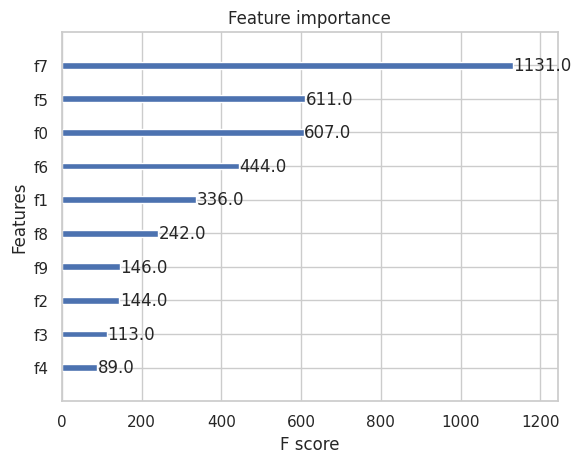

In [75]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

**f0 - Age, f1 - Job, f2 - marital status, f3- educational qualification, f4 - call type, f5 - day, f6 - mon, f7 -dur, f8 - number of calls, f9 - previous outcome f10 - y**

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.
The client should focused on the top few features of order given below to have them subscribed to the insurance.

*  Duration - As call Time Longer , Better improved of getting clients
*   Day - People who subscribed to insurance are mostly mid of the month.
*   Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.  
*   Month - In the month of may people subscribed to insurance are more.
*   Job - In this blue collar people has to be targeted more but people who subscribed more are from management job.